In [11]:
import numpy as np
from matplotlib import pyplot as plt

## Задание 6.1  
Дана  формула численного дифференцирования:
$$f'(x) \approx af(x) + bf(x + k_1h) + cf(x + k_2h) + df(x + k_3h)$$

Требуется  исследовать поведение погрешностей при численном дифференцировании.

Вариант №11: $$f'(x) \approx af(x) + bf(x + 11h) + cf(x + 2h) + df(x - 14h)$$

#### 1. Определить коэффициенты a, b, c, d так, чтобы формула имела максимальный порядок точности(см. вывод в тетрадм)
#### Покажи на графиках оптимальное значение k

#### 2. Реализовать программно полученную формулу численного дифференцирования и формулу правой разностной производной. 

In [12]:
a, b, c, d = (-40 / 77), (-28 / 2475), (77 / 144), (-11 / 2800)

def method_df(x, f, h):
    return (a * f(x) + b * f(x + 11*h) + c * f(x + 2*h) + d * f(x - 14 * h)) / h

def right_df(x, f, h):
    return (f(x + h) - f(x)) / h

#### 3. В качестве тестовой функции для проверки корректности работы программы взять функцию из задачи 5.1. На отрезке [a,b] построить графики точной производной и полученные по формулам  численного дифференцирования, выбрав шаг  h0=0.0001.

Функция из задачи 5.1: $$f(x) =  5.4 + 2.1x + 0.3x^2 + 2.1x^3 + 1.6x^4$$
Отрезок: $$ [a, b] = [1, 3] $$

15.4
15.399999999504004
15.401620084993795


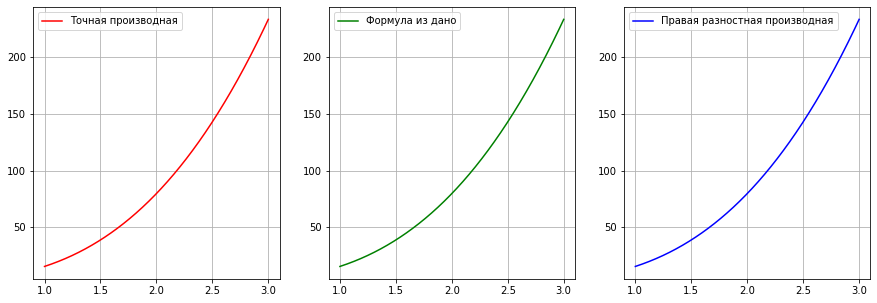

In [13]:
def F(x):
    return (5.4 + 2.1 * x + 0.3 * x ** 2 + 2.1 * x ** 3 + 1.6 * x ** 4)

def dF(x):
    return (2.1 + 0.3 * 2 * x + 2.1 * 3 * x ** 2 + 1.6 * 4 * x ** 3)

print(dF(1))
print(method_df(1, F, 0.0001))
print(right_df(1, F, 0.0001))

A, B = 1, 3
h = 0.0001
points = np.linspace(A, B, 1000)
#Возможно, от нас хотят, чтобы мы строили график по числу точек, исходя из размера шага
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].plot(points, dF(points), color='red', label='Точная производная')
axs[1].plot(points, method_df(points, F, h), color='green', label='Формула из дано')
axs[2].plot(points, right_df(points, F, h), color='blue', label='Правая разностная производная')
axs[0].legend()
axs[1].legend()
axs[2].legend()
axs[0].grid()
axs[1].grid()
axs[2].grid()

#### 4. Взять функцию из задачи 5.2. Выбрать фиксированную точку на отрезке [a,b] и вычислить значения производных  по формулам  численного дифференцирования,  уменьшая шаг дифференцирования  h0=0.1 последовательно в 10 раз:  , k=0,1,2,…Найти оптимальное значение шага дифференцирования для каждой формулы численного дифференцирования.  По полученным данным построить графики погрешностей.

Функция из задачи 5.2: $$f(x) = e^x sin(2\pi x)$$

Отрезок: $$ [a, b] = [3, 5]$$

In [14]:
def F2(x):
    return np.exp(x) * np.sin(2 * np.pi * x)

def dF2(x):
    return np.exp(x) * (np.sin(2 * np.pi * x) + \
                        np.cos(2 * np.pi * x) * 2 * np.pi)

Зн-ие при k = 6 -- 2.104150240711533e-05
Зн-ие при k = 7 -- 2.3908207538170245e-06
Зн-ие при k = 8 -- 6.632637624193194e-05


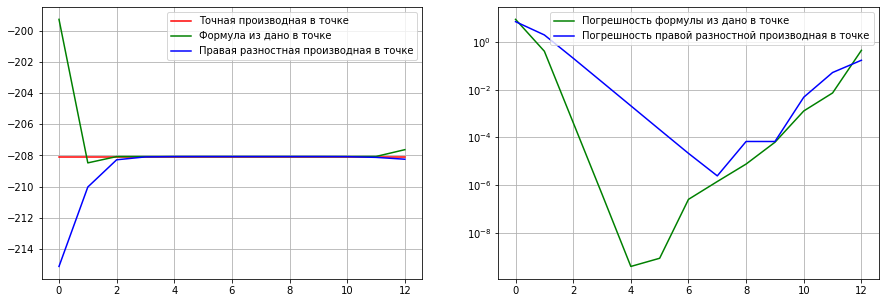

In [15]:
#Возьмём точку x = 3.5
val_x = 3.5
h = 0.1
k = 13
k_points = [i for i in range(k)]
h_points = np.array([h * 10 ** (-i) for i in range(k)])
val_y = dF2(val_x)
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].plot(k_points, [val_y] * k, color='red', label='Точная производная в точке')
axs[0].plot(k_points, method_df(val_x, F2, h_points), color='green',\
                                    label='Формула из дано в точке')
axs[0].plot(k_points, right_df(val_x, F2, h_points), color='blue', \
                        label='Правая разностная производная в точке')
axs[0].legend()
axs[0].grid()

plt.yscale('log')
axs[1].plot(k_points, np.abs(method_df(val_x, F2, h_points) - val_y), color='green', \
                                            label='Погрешность формулы из дано в точке')
axs[1].plot(k_points, np.abs(right_df(val_x, F2, h_points) - val_y), color='blue',\
                                label='Погрешность правой разностной производная в точке')
axs[1].legend()
axs[1].grid()


print('Зн-ие при k = 6 --', np.abs(right_df(val_x, F2, h_points[6]) - val_y))
print('Зн-ие при k = 7 --', np.abs(right_df(val_x, F2, h_points[7]) - val_y))
print('Зн-ие при k = 8 --', np.abs(right_df(val_x, F2, h_points[8]) - val_y))

## Задание 6.2
Найти  приближенное решение  задачи Коши для обыкновенного дифференциального  уравнения (ОДУ) 1 порядка с точностью $$ \varepsilon = 10^{-6}$$ .
$$ y' = r(t)y(y), ~~ t \in [t_0, T] $$

$$ y(t_0) = y_0 $$

Вариант №11: $$y' = (\frac{t}{1 + t^2})y, ~~ t \in [0, 2] $$ 

$$ y(0) = 1$$


Правило Рунге: $$y - y^{h/2} \approx \frac{y^{h/2} - y^h}{2^k - 1} $$

#### 1. Найти аналитическое решение задачи(см. в тетради)

#### 2. Составить  программу вычисления  решения  методом Эйлера с  заданной точностью, используя правило Рунге. Найти решение задачи с точностью, число точек N и шаг, при котором точность достигается. Построить график решения.

Метод Эйлера: $$ y_{i + 1} = y_i + hf_i = y_i + hy_i (\frac{t_i}{1 + {t_i}^2})$$

In [16]:
#В правило Рунге мы посылаем список зн-ий, вычисленных с помощью правила Эйлера в заданных точках.
#Будем сравнивать зн-ия в точках с одинаковыми индексами, т.к. списки с со зн-ми с шагом h и h / 2 отличаются кол-ом отрезков 
#разбиения в 2 раза, то точке зн-ию в точке с индексом i будет соот-ть зн-ие в точке с индексом 2 * i. 
#Пройдёмся по обоим спискам по, вычисляю погрешности в заданных точках, попутно формируя список погрешностей.
#Затем найдём максимум из списка погрешностей - это будет Глобальная погрешность
def Runge(y_h, y_half_h, k):
    lst_erors = []
    for i in range(len(y_h)):
        lst_erors.append(np.abs(y_h[i] - y_half_h[2 * i]) / (2 ** k - 1))
    return max(lst_erors)

def R(x):
    return x / (1 + x ** 2)

#Формируем список точек
def Euler(r, n, h, y_cur, t_i):
    lst_y_i = [y_cur]
    for i in range(1, n + 1):
        y_next = y_cur * (1 + h * r(t_i))
        lst_y_i.append(y_next)
        y_cur = y_next
        t_i = i * h
    return lst_y_i 

def Real_f(x):
    return np.sqrt(1 + x ** 2)

In [17]:
t_0, T = 0, 2
eps = 1e-6
y_0 = 1
n = 8 #Число отрезков разбиения
h = (T - t_0) / n
lst_y_h = Euler(R, n // 2, 2 * h, y_0, t_0)
lst_y_half_h = Euler(R, n, h, y_0, t_0)
while (Runge(lst_y_h, lst_y_half_h, 1)) > eps:
    n *= 2
    h /= 2
    lst_y_h = lst_y_half_h
    lst_y_half_h = Euler(R, n, h, y_0, t_0)
print('Число точек разбиения:', n + 1)
print('Шаг разбиения:', h)

Число точек разбиения: 2097153
Шаг разбиения: 9.5367431640625e-07


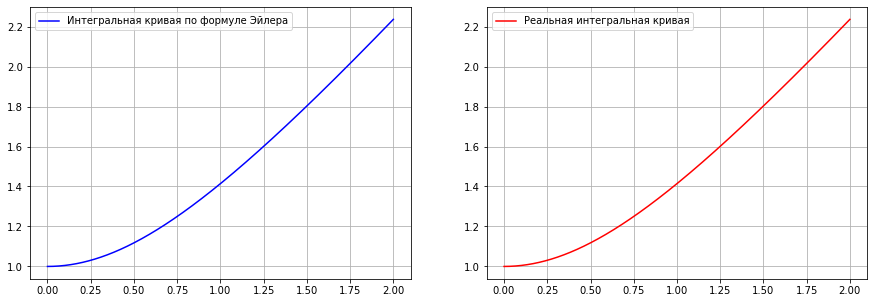

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
points = np.linspace(t_0, T, n + 1)
axs[0].plot(points, lst_y_half_h, color='blue', label='Интегральная кривая по формуле Эйлера')
axs[0].legend()
axs[0].grid()

axs[1].plot(points, Real_f(points), color='red', label='Реальная интегральная кривая')
axs[1].legend()
axs[1].grid()

#### 2.Составить  программу вычисления  решения с  заданной точностью методом индивидуального варианта. Найти решение задачи с заданной точностью,   число точек N и шаг, при котором точность достигается. Построить график решения задачи.

Вариант №11: Интерполяционный метод Адамаса 2-ого порядка

Расчётная формула: $$y_{i + 1} = y_i + \frac {h}{2}(f_i + f_{i + 1}) $$

In [19]:
def Adamas(n, h, y_cur, t_i):
    lst_y_i = [y_cur]
    for i in range(1, n + 1):
        y_next = y_cur * (1 + 0.5 * h * t_i / (1 + t_i ** 2)) / \
                    (1 - 0.5 * h * (t_i + h) / (1 + (t_i + h) ** 2))
        lst_y_i.append(y_next)
        y_cur = y_next
        t_i = i * h
    return lst_y_i 

In [21]:
t_0, T = 0, 2
eps = 1e-6
y_0 = 1
n = 8 #Число отрезков разбиения
h = (T - t_0) / n
lst_y_h = Adamas(n // 2, 2 * h, y_0, t_0)
lst_y_half_h = Adamas(n, h, y_0, t_0)
while (Runge(lst_y_h, lst_y_half_h, 2)) > eps:
    n *= 2
    h /= 2
    lst_y_h = lst_y_half_h
    lst_y_half_h = Adamas(n, h, y_0, t_0)
print('Число точек разбиения:', n + 1)
print('Шаг разбиения:', h)

Число точек разбиения: 1025
Шаг разбиения: 0.001953125


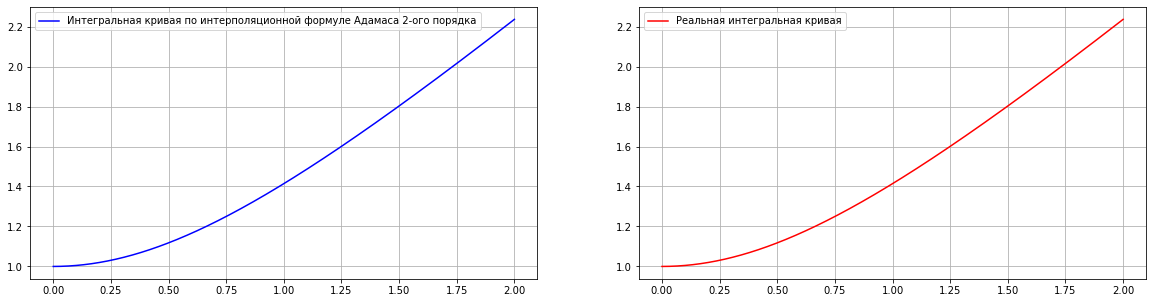

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))
points = np.linspace(t_0, T, n + 1)
axs[0].plot(points, lst_y_half_h, color='blue', label='Интегральная кривая по интерполяционной формуле Адамаса 2-ого порядка')
axs[0].legend()
axs[0].grid()

axs[1].plot(points, Real_f(points), color='red', label='Реальная интегральная кривая')
axs[1].legend()
axs[1].grid()

#### Сравнительная таблица методов

| Метод                                      |Число точек разбиения  |  Шаг                                 |
|:-------------------------------------------|:---------------------:|-------------------------------------:|
| Метод Эйлера                               |        $n = 2097153 $ |            $h = 9.5367431640625e-07$ |
|Интерполяционный метод Адамаса 2-ого порядка|           $ n = 1025$ |                    $h = 0.001953125$ |
